In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../input/RetailDemoRecomendation/Demo_Retail_Dataset.csv")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
print(df.shape)
print(df.columns)

(541909, 8)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
## convert the customerId to make a strng
df['CustomerID'] = df['CustomerID'].apply(lambda x : 'C'+str(int(x)) )

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,C17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,C17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,C17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,C17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,C17850,United Kingdom


In [11]:
## drop the description if it not upper case
## in this dataset description which is lowercase are invalid
df = df[df['Description'].str.upper() == df['Description']]

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,C17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,C17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,C17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,C17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,C17850,United Kingdom


In [13]:
df = df[['CustomerID','Description','InvoiceNo','Quantity']]
df.head()

,CustomerID,Description,InvoiceNo,Quantity
0,C17850,WHITE HANGING HEART T-LIGHT HOLDER,536365,6
1,C17850,WHITE METAL LANTERN,536365,6
2,C17850,CREAM CUPID HEARTS COAT HANGER,536365,8
3,C17850,KNITTED UNION FLAG HOT WATER BOTTLE,536365,6
4,C17850,RED WOOLLY HOTTIE WHITE HEART.,536365,6


# Non Personalized Recommendationnon personalized recommendation are nothing but list of popular items
you can find it by 
- most popular items based on the total numbers of orders
- most popular items based on the total quantity sold 

in order to find it we need to group by the product and aggragate (sum) it up the quantity sold.It can be done with GROUP BY clause in SQL and python easily.

same product has same description in the data set.so if we search by description we can found how many same product are there

In [14]:
recom1 = df.groupby("Description").agg(quantity=('Quantity','sum')).sort_values(by='quantity',ascending=False).head(15)
## group by Description
## then aggragate The quantity
## now aggragate means COUNT SUM etc . we select sum
## then sort by quantity Descending and we get the non personalized Recommendation

In [15]:
recom1

,quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409
POPCORN HOLDER,30504
RABBIT NIGHT LIGHT,27094
MINI PAINT SET VINTAGE,25880
PACK OF 12 LONDON TISSUES,25321


<Axes: xlabel='Description'>

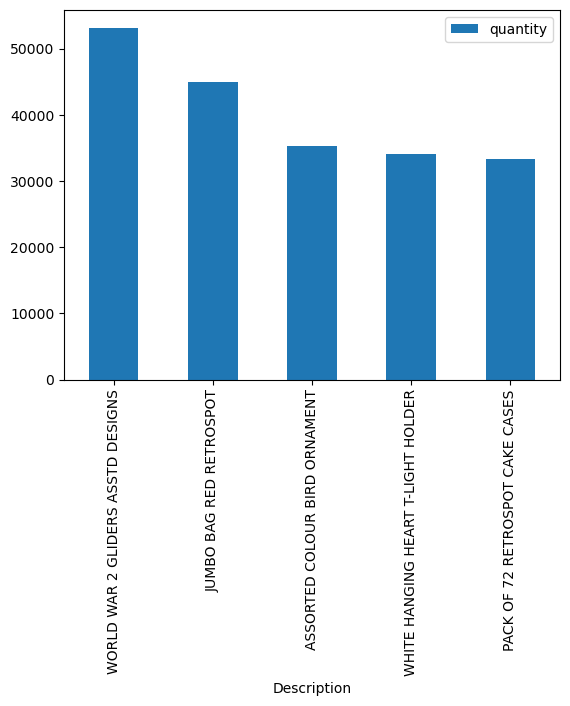

In [16]:
recom1.head(5).plot(kind='bar')

<Axes: xlabel='Description'>

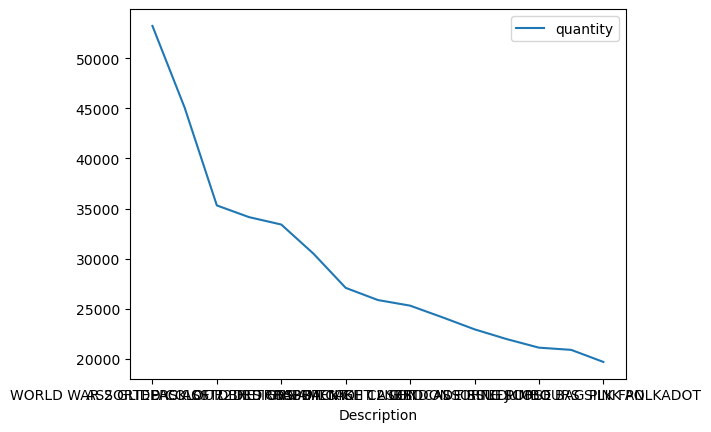

In [17]:
recom1.plot()

In [18]:
recom1.reset_index()

,Description,quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1,JUMBO BAG RED RETROSPOT,45066
2,ASSORTED COLOUR BIRD ORNAMENT,35314
3,WHITE HANGING HEART T-LIGHT HOLDER,34147
4,PACK OF 72 RETROSPOT CAKE CASES,33409
5,POPCORN HOLDER,30504
6,RABBIT NIGHT LIGHT,27094
7,MINI PAINT SET VINTAGE,25880
8,PACK OF 12 LONDON TISSUES,25321
9,PACK OF 60 PINK PAISLEY CAKE CASES,24163


array([<Axes: ylabel='quantity'>], dtype=object)

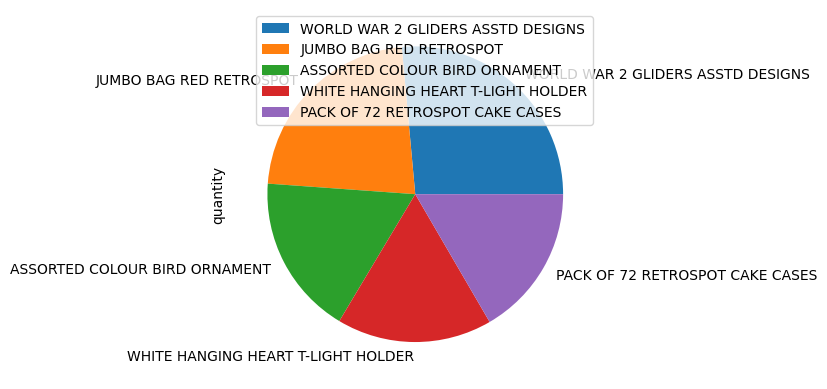

In [19]:
recom1.head(5).plot(kind='pie',subplots=True)

# PERSONAL RECOMMENDATION USING COLABORATIVE FILTERING

first we need to make the interaction matrix.which row are the customers and columns are the product and the interaction value will be the quantity of the product bought

In [20]:
# first we need to make the interaction matrix.which row are the customers and columns are the product and the interaction value will be the quantity of the product bought
# if there is no interaction then fill with 0.0
interaction_matrix = df.pivot_table(index='CustomerID', columns=['Description'],values='Quantity',fill_value=0.0)


In [21]:
interaction_matrix

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
C12346,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0
C12347,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0
C12348,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0
C12349,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0
C12350,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C18280,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0
C18281,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0
C18282,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0


# USER BASED COLLABORATIVE FILTERING
### Four Steps
- 1) first select an active user (target user)
- 2) Find similarities with all other users
- 3) Find some users that are most similar to active user
- 4) based on their like find the recommendation

In [28]:
customer_id = 'C12347'  ## choose a random user to find its recommendation/ target user's customer ID

## .loc is used to find the row wise data of the index . in this case CustomerID
## find the active_user_row using the loc method/ find the target user row
active_user = interaction_matrix.loc[customer_id]

## use the corrwith() method to find the correlation with all the other user_row with active_user row
## consoder this active_user is a row
## and interaction_matrix.corrwith(active_user,axis=1,method='pearson') will find the correlation of the other row 
## (pearson correlation) with other row


## every row of the interaction_matrix considered a vector
## and we need to find the correlation with out target vector to all other vector
## it can be measured with euclidian measures or cosine similarity or pearson correlation function
## here we get all the correlation with our target vector

recommendations = interaction_matrix.corrwith(active_user,axis = 1,method='pearson')

In [29]:
final_recom = recommendations.dropna()
print(final_recom)

CustomerID
C12347    1.000000
C12348    0.163545
C12349    0.005202
C12350    0.015139
C12352    0.004437
            ...   
C18280    0.007461
C18281   -0.003102
C18282    0.010109
C18283    0.019187
C18287    0.101071
Length: 4350, dtype: float64


In [32]:
final_recom_df = pd.DataFrame(final_recom,columns=['correlation'])

In [35]:
f_df = final_recom_df.reset_index()

In [37]:
f_df = f_df.sort_values(by='correlation',ascending=False)

In [46]:
top_15 = f_df.iloc[1:16]

In [48]:
 top_15 =  top_15.set_index('CustomerID')

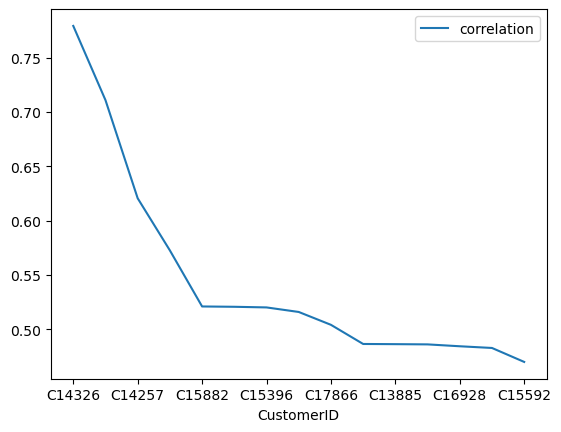

In [50]:
top_15.plot()
plt.legend()

## now we found the most  similar user of active_user = 'C12347' which is 'C14326'
## so we need to recommended the active_user
## we will do 1 thing
## find the item that are used by the similar user but not by the active user
## we will take all the items of the similar user but not the common one

In [59]:
active_user_CustomerID = 'C12347'
similar_user_CustomerID = 'C14326'
active_user_row_info = interaction_matrix.loc[active_user_CustomerID]
similar_user_row_info = interaction_matrix.loc[similar_user_CustomerID]


In [77]:
item_recommended = []
for item,quantity in similar_user_row_info.items(): ## loop through the item and quantity of the similar user row item
    if quantity>0:                                  ## filter so the quantity is > 0 because we take the item which are purchased we dont take 0
        if active_user_row_info[item] == 0:         ## make sure that the active user does not already have it   
            recom_item = {'recommended_item':item,'Quantity':int(quantity)}
            item_recommended.append(recom_item)
            

In [78]:
final = pd.DataFrame(item_recommended)

In [82]:
final

,recommended_item,Quantity
0,ANTIQUE SILVER T-LIGHT GLASS,12
1,ENAMEL FLOWER JUG CREAM,3
2,FELTCRAFT 6 FLOWER FRIENDS,12
3,GROW YOUR OWN BASIL IN ENAMEL MUG,8
4,HANGING HEART JAR T-LIGHT HOLDER,12
5,SET/3 OCEAN SCENT CANDLE JEWEL BOX,4


# ITEM BASED COLLABORATIVE FILTERING
- select an active user 
- select an item used by that active user
- find similar items used by the active user
- make the recommendation

In [85]:
# select a user
active_user_CustomerID = 'C12347'
active_user = interaction_matrix.loc[active_user_CustomerID]
active_user

Description
 4 PURPLE FLOCK DINNER CANDLES      0.0
 50'S CHRISTMAS GIFT BAG LARGE      0.0
 DOLLY GIRL BEAKER                  0.0
 I LOVE LONDON MINI BACKPACK        0.0
 I LOVE LONDON MINI RUCKSACK        0.0
                                   ... 
ZINC T-LIGHT HOLDER STARS SMALL     0.0
ZINC TOP  2 DOOR WOODEN SHELF       0.0
ZINC WILLIE WINKIE  CANDLE STICK    0.0
ZINC WIRE KITCHEN ORGANISER         0.0
ZINC WIRE SWEETHEART LETTER TRAY    0.0
Name: C12347, Length: 3873, dtype: float64

In [88]:
## choose a product that active user purchesed / in this case we choose first product you can choose a
## purchased product you want depending on the product recommmendation willbe different
for item,quantity in active_user.items():
    if quantity > 0:
        target_item = item
        break

In [89]:
target_item

'3D DOG PICTURE PLAYING CARDS'

In [96]:
## now we find the row not based on user but based on the item what we selected
target_column = interaction_matrix[target_item]

In [97]:
# now we need to find the correlation with other product
# remember product is in the column not the row
# so we need to find correlation column wise
# thats why we avoid writing axis=1

recommendations = interaction_matrix.corrwith(target_column)

In [99]:
recommendations.dropna(inplace=True)
final_recom_product = pd.DataFrame(recommendations,columns=['correlation']).reset_index()

In [101]:
ff = final_recom_product.sort_values(by='correlation',ascending=False)

In [102]:
ff.head(10)

,Description,correlation
68,3D DOG PICTURE PLAYING CARDS,1.000000
351,BLACK EAR MUFF HEADPHONES,0.655657
360,BLACK GRAND BAROQUE PHOTO FRAME,0.651162
507,BOOM BOX SPEAKER BOYS,0.433938
585,CAMOUFLAGE EAR MUFF HEADPHONES,0.407054
71,3D SHEET OF DOG STICKERS,0.384929
1671,ICE CREAM SUNDAE LIP GLOSS,0.314309
2696,RED REFECTORY CLOCK,0.287252
803,CLEAR LOVE BIRD T-LIGHT HOLDER,0.266015
3153,SILVER DIAMANTE PEN IN GIFT BOX,0.258999
